# ЛР 1. Предварительный анализ данных

Цель: осуществить предварительную обработку данных csv-файла,
выявить и устранить проблемы в этих данных.

> Индивидуальный вариант: N13

In [1]:
# импортируем библиотеку pandas для работы с данными
import pandas as pd

Загрузка данных по ссылке на github файл (где был выложен CSV-файл с данными)

In [2]:
DATASET_URI: str = "https://raw.githubusercontent.com/m0rphed/suai-data-analysis-intro/refs/heads/lab01/data/01_datasets/clients.csv"
df = pd.read_csv(DATASET_URI, sep = ";")

- Проверяем что данные загружены - смотрим первые 15 строк

In [3]:
df.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0
5,7446,1967,Master,Together,62513.0,0.0,09.09.2013,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,13.11.2012,4.0
7,6177,1985,PhD,Married,33454.0,1.0,08.05.2013,2.0
8,4855,1974,PhD,Together,30351.0,1.0,06.06.2013,1.0
9,5899,1950,PhD,Together,5648.0,1.0,13.03.2014,1.0


Данные из набора `clients.csv`

| Название столбца  | Что в колонке                       |
|-------------------|-------------------------------------|
| ID                | уникальный идентификатор клиента    |
| Year_Birth        | год рождения клиента                |
| Education         | уровень образования клиента         |
| Marital_Status    | семейное положение клиента          |
| Income            | годовой доход семьи                 |
| Kidhome           | количество детей                    |
| Dt_Customer       | дата регистрации клиента в компании |
| NumDealsPurchases | количество покупок                  |

Получение краткой обобщённой информации о даннах с помощью вызова `df.info()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 796 non-null    int64  
 1   Year_Birth         796 non-null    int64  
 2   Education          796 non-null    object 
 3   Marital_Status     796 non-null    object 
 4   Income             784 non-null    float64
 5   Kidhome            795 non-null    float64
 6   Dt_Customer        795 non-null    object 
 7   NumDealsPurchases  795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB


- Становится понятно, что в данных присутствуют пропуски, т.к. не везде количество Non-Null (полей имеющих значения) полей одинаковое:

  - Максимальное кол-во *не-null* строк (= 796) в столбцах: `ID`, `Year_Birth`, `Education`, `Marital_Status` - в них нет пропусков  
  - В столбцах: `Kidhome`, `Dt_Customer`, `NumDealsPurchases` - 795 *не-null* строк, т.е. есть 1 пропуск
  - В столбце `Income` - 784 значений, т.е. 12 пропусков

- С помощью вызова метода `describe` получим описательную статистику которая включает: минимальные и максимальные значения, процентили, медиану и стандартное отклонение набора данных, опуская пропуски в нём.

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,NumDealsPurchases
count,796.000000,796.000000,784.00000,795.000000,795.000000
mean,5630.133166,1968.356784,53130.07398,0.438994,2.314465
std,3273.039715,12.022132,21818.56876,0.547252,1.941650
min,0.000000,1899.000000,2447.00000,0.000000,0.000000
25%,2853.000000,1959.000000,36141.75000,0.000000,1.000000
50%,5563.000000,1969.500000,52372.50000,0.000000,2.000000
75%,8584.250000,1977.000000,69293.25000,1.000000,3.000000
max,11191.000000,1995.000000,162397.00000,2.000000,15.000000


Рассмотрим на примере колонки с годом рождения что отражает эта статистика:

- `count` Количество: 796 — всего данных о годах рождения среди всех данных.
- `mean` Среднее значение: 1968.36 — средний год рождения в наборе данных.
- `std` Стандартное отклонение: 12.02 — возраст людей варьируется с небольшим разбросом.
- `min` Минимум: 1899 — покупатель, которому 125 лет.
- `%25` 25-ый процентиль: 1959 — 25% людей родились до этого года.
- `%50` Медиана (50%): 1969.5 — половина клиентов родилась до 1970 года.
- `%75` 75-й процентиль: 1977 — 75% клиентов родилась позе этого года.
- `max` Максимум: 1995 — самый поздний год рождения, т.е. самый молодой клиент.


На примере вывода `df.describe`, рассмотрев `Year_Birth` можно аналогично анализировать другие численные признаки.

> Отметим, также, что среди клиентов есть необычно пожилой человек (125 лет), однако нельзя точно сказать является ли это ошибкой, или же необычным качеством одного из клиентов попавших в нашу изначальную выборку данных.

Рассмотрим числовой признак `ID` (целочисленные значения - `int64`)

- Проверим являются ли значения поля `ID` уникальными

In [6]:
df["ID"].is_unique

False

- Мы выяснили что значения `ID` не являются уникальными - теперь требуется проверить есть ли среди них дубликаты:

In [7]:
duplicated_ids = df[df["ID"].duplicated(keep=False)]
duplicated_ids

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
791,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
792,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
793,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
794,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
795,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0


- дубликаты есть, от них нужно будет избавиться после того как мы переименуем столбцы.

## Переименование столбцов

Выведем на экран названия столбцов с помощью df.columns.

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Dt_Customer', 'NumDealsPurchases'],
      dtype='object')

Мы можем заметить проблемы с названиями столбцов.

- `NumDealsPurchases` - не удовлетворяет Snake Case
- `Dt_Customer` - интуитивно не понятное название колонки
- все названия можно привести к нижнему регистру для красоты

Исправим названия

In [9]:
df = df.rename(
    columns={
        'NumDealsPurchases': 'Num_Purchases',
        'Dt_Customer': 'Register_Date'
    }
)

df.columns = df.columns.str.lower()
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'register_date', 'num_purchases'],
      dtype='object')

## Удаление пропусков

Ранее мы уже встречали пропуски, посмотрим на них в более приятном виде

In [10]:
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values == 0:
        continue
    print(f"{column}: {missing_values} пропусков из {len(df)} записей")

income: 12 пропусков из 796 записей
kidhome: 1 пропусков из 796 записей
register_date: 1 пропусков из 796 записей
num_purchases: 1 пропусков из 796 записей


Всего 15 пропусков из 796. Это меньше 2%. Поэтому пропуски можно просто удалить.

Однако, можно сохранить данные, которых и так не много

Заполнение пропусков:

- `income`: Можно заполнить медианным значением, чтобы избежать влияния выбросов (их наличие можно заметить по describe выше) и сохранить имеющееся распределение.
- `register_date`, `kidhome`, `num_purchases`: это категориальные значения, пропуски можно запонить модой - наиболее частым значением.

In [11]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    # тут мы отключаем предупреждения
    # о будущих изменениях библиотеки pandas
    # - это не ошибки, а ворнинги
    df['income'].fillna(
        df['income'].median(),
        inplace=True
    )

    df['register_date'].fillna(
        df['register_date'].mode()[0],
        inplace=True
    )

    df['kidhome'].fillna(
        df['kidhome'].mode()[0],
        inplace=True
    )

    df['num_purchases'].fillna(
        df['num_purchases'].mode()[0],
        inplace=True
    )

Проверим датасет на наличие пропусков снова

In [12]:
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values == 0:
        continue
    print(f"{column}: {missing_values} пропусков из {len(df)} записей")
# отсутствие сообщений - будет свидетельством того что пропуски были удалены

Мы избавились от пропусков

## Избавление от дубликатов

### Явные дубликаты

Проверим данные на наличие явных дубликатов



In [13]:
df[df.duplicated()]

,id,year_birth,education,marital_status,income,kidhome,register_date,num_purchases
792,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
793,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
794,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
795,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0


In [14]:
df.duplicated().sum()

np.int64(4)

Удалим эти дубликаты и обновим индексацию

In [15]:
df = df.drop_duplicates().reset_index(drop=True)

Проверим данные на наличие явных дубликатов снова

In [16]:
df[df.duplicated()]

,id,year_birth,education,marital_status,income,kidhome,register_date,num_purchases


Таким образом явные дубликаты были удалены

### Неявные дубликаты

Пройдемся по каждой имеющейся колонке в поисках неявных дубликатов

Колонка `id` должна удовлетворять условию уникальности. Проверим это.

In [17]:
len(df["id"].unique()), len(df["id"])

(792, 792)

В `id` содердатся только уникальные идентификаторы

В колонке `education` дубликатов не замечено

In [18]:
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

Посмотрим на уникальные значения `marital_status`.

In [19]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'MARRIED', 'SINGL',
       'Widow', 'Alone'], dtype=object)

Видим неявные дубликаты:
-  Married - MARRIED
-  Single - SINGL

Исправим это

In [20]:
df['marital_status'] = df['marital_status'].replace('MARRIED', 'Married')
df['marital_status'] = df['marital_status'].replace('SINGL', 'Single')

In [21]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

Single, Widow, Alone - разные понятия, поэтому не будем считать их дубликатами.

Уникальные значения колонки `kidhome` выглядят адекватно.

In [22]:
df['kidhome'].unique()

array([0., 1., 2.])

## Изменение типов данных

Посмотрим на типы данных.

In [23]:
df.dtypes

id                  int64
year_birth          int64
education          object
marital_status     object
income            float64
kidhome           float64
register_date      object
num_purchases     float64
dtype: object

Некоторые типы данных нуждаются в изменении:
- `year_birth`, `register_date` - даты, приведем их к datetime типу
- `education`, `marital_status` - приведем их к категориальному типу. Это более точно и будет полезно в дальнейшем, при сортировке (благодаря `ordered=True`)
- `kidhome` - количество детей не может быть вещественным, приведем к int типу
- `num_purhases` - количество покупок не может быть вещественным, приведем к int типу

In [24]:
df['year_birth'] = pd.to_datetime(
    df['year_birth'],
    format="%Y"
).dt.year

df['education'] = pd.Categorical(
    df['education'],
    categories=[
        'Basic',
        'Graduation',
        'Master',
        'PhD'
    ],
    ordered=True
)

df['marital_status'] = pd.Categorical(
    df['marital_status'],
    categories=[
        'Single',
        'Together',
        'Married',
        'Divorced',
        'Widow',
        'Alone'
    ]
)

df['kidhome'] = df['kidhome'].astype(int)

df['register_date'] = pd.to_datetime(
    df['register_date'],
    format="%d.%m.%Y"
)

df['num_purchases'] = df['num_purchases'].astype(int)

Посмотрим на результат

In [25]:
df.dtypes

id                         int64
year_birth                 int32
education               category
marital_status          category
income                   float64
kidhome                    int64
register_date     datetime64[ns]
num_purchases              int64
dtype: object

Посмотрим на датафрейм с измененными типами данных.

In [26]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,register_date,num_purchases
0,5524,1957,Graduation,Single,58138.0,0,2012-09-04,3
1,2174,1954,Graduation,Single,46344.0,1,2014-03-08,2
2,4141,1965,Graduation,Together,71613.0,0,2013-08-21,1
3,6182,1984,Graduation,Together,26646.0,1,2014-02-10,2
4,5324,1981,PhD,Married,58293.0,1,2014-01-19,5


## Группировка

Осуществим группировки и создадим сводные таблицы в соответствии с вариантом 13.


**Задание 1**

Группировка - семейный статус (marital_status) по количеству детей. Результат должен иметь  примерно следующий вид:

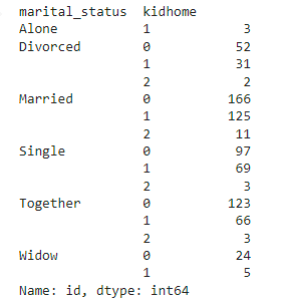

In [27]:
df.groupby(
    ['marital_status', 'kidhome'],
    observed=False
).size()

marital_status  kidhome
Single          0           98
                1           73
                2            4
Together        0          124
                1           66
                2            3
Married         0          170
                1          125
                2           12
Divorced        0           52
                1           31
                2            2
Widow           0           24
                1            5
                2            0
Alone           0            0
                1            3
                2            0
dtype: int64

Группировка показывает количество людей по семейному положению (marital_status) и количеству детей (kidhome). Например, среди холостых (Single) 98 человек без детей, 73 с одним ребенком и 4 с двумя детьми. Аналогично для остальных категорий семейного положения.

**Задание 2**

Группировка - семейный статус (marital_status) по количеству детей.  Создать датафрейм. Переименовать столбец с количеством в “сountˮ. Отсортировать по убыванию столбца “countˮ.

In [28]:
group_ds = df.groupby(
    ['marital_status', 'kidhome'],
    observed=False
).size()

Преобразуем DataSeries в DataFrame

In [29]:
group_df = group_ds.to_frame()
group_df

0
marital_status kidhome     
Single         0         98
               1         73
               2          4
Together       0        124
               1         66
               2          3
Married        0        170
               1        125
               2         12
Divorced       0         52
               1         31
               2          2
Widow          0         24
               1          5
               2          0
Alone          0          0
               1          3
               2          0

Переименуем столбец с количеством в `count`

In [30]:
group_df.rename(
    columns={group_df.columns[-1]: "count"},
    inplace=True
)

Выполним сортировку по убыванию `count` и выведем сгруппированную таблицу

In [31]:
group_df.sort_values(
    by="count",
    ascending=False
)

group_df

count
marital_status kidhome       
Single         0           98
               1           73
               2            4
Together       0          124
               1           66
               2            3
Married        0          170
               1          125
               2           12
Divorced       0           52
               1           31
               2            2
Widow          0           24
               1            5
               2            0
Alone          0            0
               1            3
               2            0

## Сводные таблицы

**Задание 3**

Сводная таблица (pivot_table) - среднее количество покупок для каждого уровня
образования. Отсортировать по убыванию. Округлить до двух знаков.

In [32]:
pivot_table1 = df.pivot_table(
    values='num_purchases',
    index='education',
    aggfunc='mean',
    observed=False
).round(2)

Отсортируем полученную таблицу по убыванию

In [33]:
pivot_table1 = pivot_table1.sort_values(
    by='num_purchases',
    ascending=False
)

pivot_table1

,num_purchases
education,
PhD,2.55
Master,2.52
Graduation,2.17
Basic,1.40



Сводная таблица показывает среднее количество покупок (num_purchases) в зависимости от уровня образования. Люди с PhD в среднем совершают 2.55 покупки, с Master — 2.52, с Graduation — 2.17, а с Basic — 1.40.

**Задание 4**
Сводная таблица (pivot_table) - среднее количество покупок по уровню образованию - строки и году рождения - столбцы. Отсортировать по возрастанию education.  Округлить до двух знаков.

Изменим сводную таблицу из прошлого задания, добавив столбцы - год рождения

In [34]:
pivot_table2 = df.pivot_table(
    values="num_purchases",
    index="education",
    columns="year_birth",
    aggfunc="mean",
    observed=False
).round(2)

Отсортируем по возрастанию степени образования и выведем полученную сводную таблицу

In [35]:
pivot_table2.sort_values(
    by="education",
    ascending=True
)

pivot_table2

year_birth,1899,1941,1943,1944,1945,1946,1947,1948,1949,1950,...,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
education,,,,,,,,,,,,,,,,,,,,,
Basic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,2.00,NaN,1.00,1.0,NaN,NaN,NaN,NaN,NaN
Graduation,NaN,NaN,NaN,1.0,NaN,1.67,1.0,1.00,1.0,2.00,...,1.12,1.67,1.92,1.78,1.0,1.0,1.0,1.0,1.0,1.0
Master,NaN,NaN,1.0,1.0,1.0,1.00,1.0,1.00,2.2,5.00,...,2.50,1.00,1.00,2.00,NaN,NaN,1.0,NaN,NaN,NaN
PhD,1.0,0.0,1.5,1.0,1.5,2.00,1.0,2.43,2.5,1.67,...,1.50,NaN,1.00,1.00,NaN,1.0,NaN,NaN,NaN,NaN


Сводная таблица показывает среднее количество покупок в зависимости от года рождения (year_birth) и уровня образования. Видно, что значения варьируются по годам, где, например, люди с PhD, рожденные в 1989 году, совершают в среднем 1 покупку, а те, кто родился в 1949 году — 2.43 покупки. Пустые значения (NaN) означают отсутствие данных для соответствующего сочетания года и уровня образования.

## Вывод

В ходе лабораторной работы была проведена предварительная обработка данных о клиентах магазина из CSV-файла. Предобработка проводилась с использованием библиотеки Pandas.

В процессе работы данные были загружены, был проведен их обзор и оценка. Был определен общий объем данных, количество пропусков в них и типы столбцов. Отдельное были рассмотрены числовые столбцы.

Также были выявлены и исправлены проблемы в данных. Были исправлены проблемы с названиями столбцов. Данные были проверены на наличие пропусков, которые были устранены путем их заполнения. Также была произведена корректировка типов данных для соответствия действительности.

Кроме того, были выполнены две группировки данных и созданы две сводные таблицы в соответствии с индивидуальным вариантом.

Из группировок и сводных таблиц была получена полезная информация.

Люди с PhD и Master совершают больше покупок в среднем по сравнению с теми, кто имеет образование уровня Graduation или Basic. Семейное положение также влияет: например, среди холостых больше людей без детей, а в семьях с детьми чаще встречаются пары, состоящие в браке или отношениях. По годам рождения видно, что старшие поколения (например, 1940-е годы) совершают больше покупок, но данные неполные для всех категорий.